In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [3]:
ds_free = xr.open_dataset('../Data/hycom_free_vel.nc')
ds_free = ds_free.sel(time=slice('2009-01-01','2014-06-04'))

ds_cci = xr.open_dataset('../Data/hycom_cci_vel.nc')
ds_cci = ds_cci.sel(time=slice('2009-01-01','2014-06-04'))

ds_cmems = xr.open_dataset('../Data/cmems_ssh.nc')
ds_cmems = ds_cmems.sel(time=slice('2009-01-01','2014-06-04'))

ds_gc = xr.open_dataset('../Data/globcurrent_surface_regional.nc')
ds_gc = ds_gc.sel(time=slice('2009-01-01','2014-06-04'))

# diff = ds_cci - ds_free

## Calculate velocity magnitudes

In [3]:
# HYCOM free
hycom_free_vel = np.hypot(ds_free['u'],ds_free['v'])*100

# HYCOM cci
hycom_cci_vel = np.hypot(ds_cci['u'],ds_cci['v'])*100

# CMEMS
ds_cmems_vel = np.hypot(ds_cmems['ugos'],ds_cmems['vgos'])*100

# Timeseries

In [5]:
# Agulhas region
#=====================================================================================================================================

# Port Shepstone current core
ps_free = ds_free.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.63)).mean(dim=('longitude','latitude'), skipna=True)
ps_cci = ds_cci.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.63)).mean(dim=('longitude','latitude'), skipna=True)
ps_cmems = ds_cmems.sel(latitude=slice(-31.23,-30.09),longitude=slice(30.39,30.63)).mean(dim=('longitude','latitude'), skipna=True)
ps_gc = ds_gc.sel(lat=slice(-31.23,-30.09),lon=slice(30.39,30.63)).mean(dim=('lon','lat'), skipna=True)

# Port Elizabeth current core
pe_free = ds_free.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_cci = ds_cci.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_cmems = ds_cmems.sel(latitude=slice(-34.63,-34.49),longitude=slice(25.77,26.00)).mean(dim=('longitude','latitude'), skipna=True)
pe_gc = ds_gc.sel(lat=slice(-34.63,-34.49),lon=slice(25.77,26.00)).mean(dim=('lon','lat'), skipna=True)

# Retroflection
ret_free = ds_free.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_cci = ds_cci.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_cmems = ds_cmems.sel(latitude=slice(-39.24,-39.10),longitude=slice(20.28,20.51)).mean(dim=('longitude','latitude'), skipna=True)
ret_gc = ds_gc.sel(lat=slice(-39.24,-39.10),lon=slice(20.28,20.51)).mean(dim=('lon','lat'), skipna=True)

# Agulhas Plateau loop
apl_free = ds_free.sel(latitude=slice(-38.31,-38.12),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_cci = ds_cci.sel(latitude=slice(-38.31,-38.12),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_cmems = ds_cmems.sel(latitude=slice(-38.31,-38.12),longitude=slice(26.27,26.50)).mean(dim=('longitude','latitude'), skipna=True)
apl_gc = ds_gc.sel(lat=slice(-38.31,-38.12),lon=slice(26.27,26.50)).mean(dim=('lon','lat'), skipna=True)

# Agulhas Bank
aba_free = ds_free.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_cci = ds_cci.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_cmems = ds_cmems.sel(latitude=slice(-35.21,-35.07),longitude=slice(21.05,21.28)).mean(dim=('longitude','latitude'), skipna=True)
aba_gc = ds_gc.sel(lat=slice(-35.21,-35.07),lon=slice(21.05,21.28)).mean(dim=('lon','lat'), skipna=True)


/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Port Shepstone current core

### Magnitude

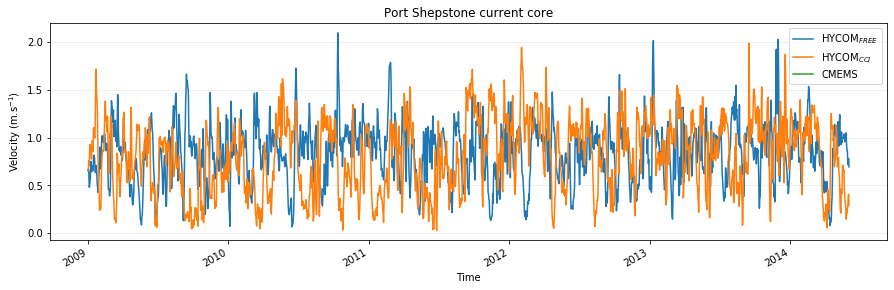

In [29]:
plt.figure(figsize=(15,4))

ps_free = np.sqrt(np.square(ps_free['v']) + np.square(ps_free['u']))
ps_cci = np.sqrt(np.square(ps_cci['v']) + np.square(ps_cci['u']))
ps_cmems = np.sqrt(np.square(ps_cmems['vgos']) + np.square(ps_cmems['ugos']))

ps_free.plot.line(x='time',label='HYCOM$_{FREE}$')
ps_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
ps_cmems.plot.line(x='time',label='CMEMS')
plt.title('Port Shepstone current core')
plt.ylabel('Velocity (m.s$^{-1}$)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Magnitude & Direction vs CMEMS

/home/harry/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


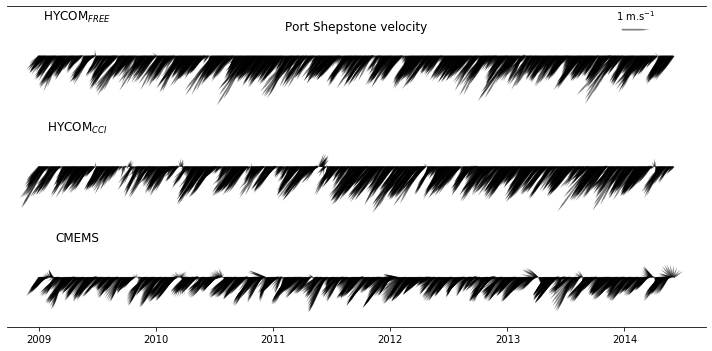

In [5]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Port Shepstone velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(ps_free['time'].values, 0, ps_free['u'][:,0], ps_free['v'][:,0], scale=25, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(ps_cci['time'].values, 0, ps_cci['u'][:,0], ps_cci['v'][:,0], scale=25, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(ps_cmems['time'].values, 0, ps_cmems['ugos'], ps_cmems['vgos'], scale=25, alpha=0.5, headwidth=1)
plt.title('CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_PortShepstone_quiver.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Magnitude & Direction vs Globcurrent

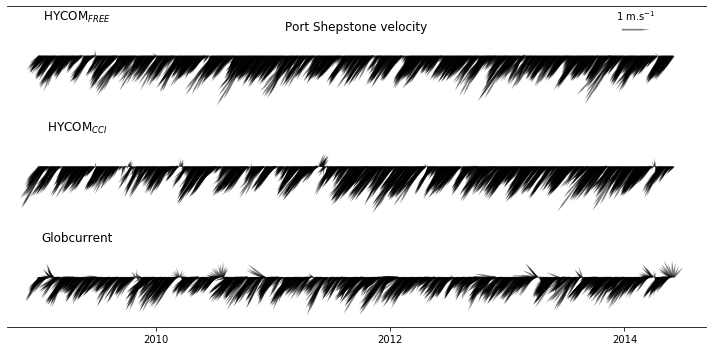

In [7]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Port Shepstone velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(ps_free['time'].values, 0, ps_free['u'][:,0], ps_free['v'][:,0], scale=25, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(ps_cci['time'].values, 0, ps_cci['u'][:,0], ps_cci['v'][:,0], scale=25, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(ps_gc['time'].values, 0, ps_gc['eastward_eulerian_current_velocity'], ps_gc['northward_eulerian_current_velocity'], scale=25, alpha=0.5, headwidth=1)
plt.title('Globcurrent', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_PortShepstone_quiver_gc.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Magnitude & Direction differences vs CMEMS

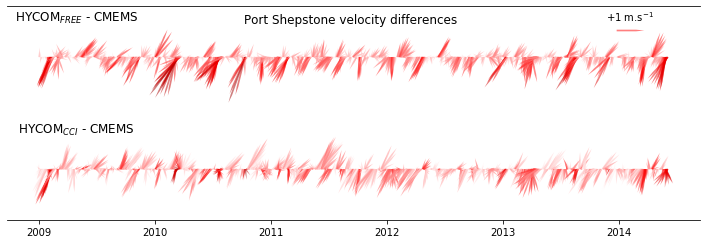

In [37]:
fig = plt.figure(figsize=(10,3.5))
fig.suptitle('Port Shepstone velocity differences', y=0.93)

ax1 = plt.subplot(2,1,1)

q = ax1.quiver(ps_free['time'].values, 0, (ps_free['u'][:,0]-ps_cmems['ugos']), (ps_free['v'][:,0]-ps_cmems['vgos']), np.hypot((ps_free['u'][:,0]-ps_cmems['ugos']), (ps_free['v'][:,0]-ps_cmems['vgos'])), norm=plt.Normalize(vmin=-2, vmax=2), cmap=plt.get_cmap('seismic'), scale=25, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '+1 m.s$^{-1}$', coordinates='axes', color='red')
plt.title('HYCOM$_{FREE}$ - CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(2,1,2)

ax2.quiver(ps_cci['time'].values, 0, (ps_cci['u'][:,0]-ps_cmems['ugos']), (ps_cci['v'][:,0]-ps_cmems['vgos']), np.hypot((ps_free['u'][:,0]-ps_cmems['ugos']), (ps_free['v'][:,0]-ps_cmems['vgos'])), norm=plt.Normalize(vmin=-2, vmax=2), cmap=plt.get_cmap('seismic'), scale=25, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$ - CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
# ax2.spines["bottom"].set_visible(False)
# ax2.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_PortShepstone_quiver_diff.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Port Elizabeth current core

### Magnitude & Direction vs CMEMS

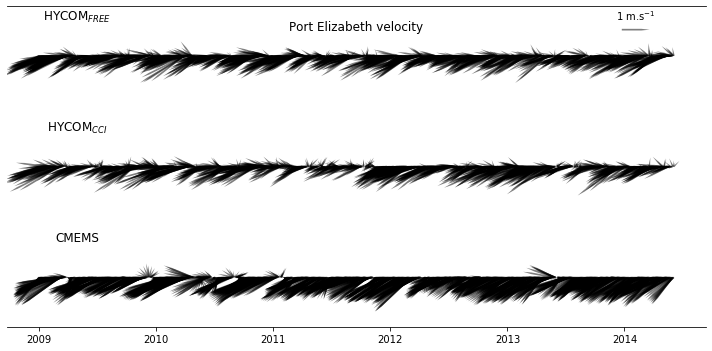

In [8]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Port Elizabeth velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(pe_free['time'].values, 0, pe_free['u'][:,0], pe_free['v'][:,0], scale=25, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(pe_cci['time'].values, 0, pe_cci['u'][:,0], pe_cci['v'][:,0], scale=25, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(pe_cmems['time'].values, 0, pe_cmems['ugos'], pe_cmems['vgos'], scale=25, alpha=0.5, headwidth=1)
plt.title('CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_PortElizabeth_quiver.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Magnitude & Direction vs Globcurrent

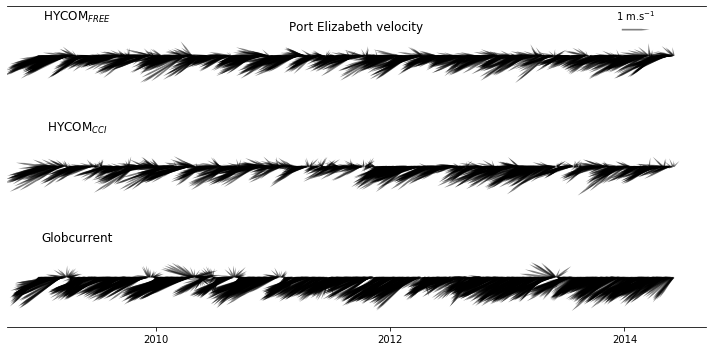

In [9]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Port Elizabeth velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(pe_free['time'].values, 0, pe_free['u'][:,0], pe_free['v'][:,0], scale=25, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(pe_cci['time'].values, 0, pe_cci['u'][:,0], pe_cci['v'][:,0], scale=25, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(pe_gc['time'].values, 0, pe_gc['eastward_eulerian_current_velocity'], pe_gc['northward_eulerian_current_velocity'], scale=25, alpha=0.5, headwidth=1)
plt.title('Globcurrent', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_PortElizabeth_quiver_gc.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

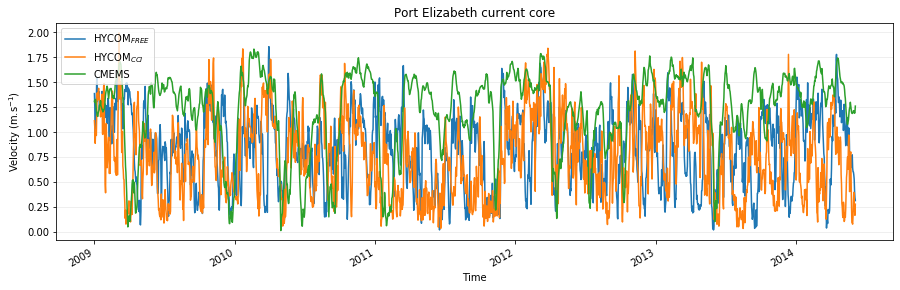

In [30]:
plt.figure(figsize=(15,4))

pe_free = np.sqrt(np.square(pe_free['v']) + np.square(pe_free['u']))
pe_cci = np.sqrt(np.square(pe_cci['v']) + np.square(pe_cci['u']))
pe_cmems = np.sqrt(np.square(pe_cmems['vgos']) + np.square(pe_cmems['ugos']))

pe_free.plot.line(x='time',label='HYCOM$_{FREE}$')
pe_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
pe_cmems.plot.line(x='time',label='CMEMS')
plt.title('Port Elizabeth current core')
plt.ylabel('Velocity (m.s$^{-1}$)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Agulhas retroflection

### Magnitude & Direction vs CMEMS

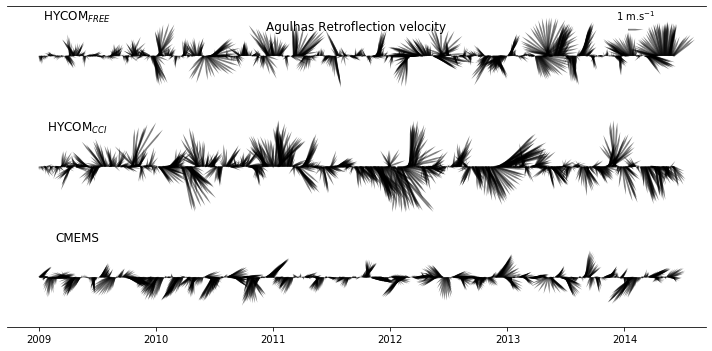

In [13]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Agulhas Retroflection velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(ret_free['time'].values, 0, ret_free['u'][:,0], ret_free['v'][:,0], scale=45, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(ret_cci['time'].values, 0, ret_cci['u'][:,0], ret_cci['v'][:,0], scale=45, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(ret_cmems['time'].values, 0, ret_cmems['ugos'], ret_cmems['vgos'], scale=45, alpha=0.5, headwidth=1)
plt.title('CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_AgulhasRetroflection_quiver.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Magnitude & Direction vs Globcurrent

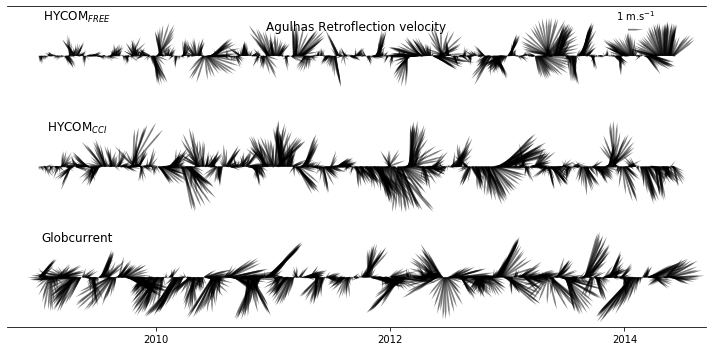

In [11]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Agulhas Retroflection velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(ret_free['time'].values, 0, ret_free['u'][:,0], ret_free['v'][:,0], scale=45, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(ret_cci['time'].values, 0, ret_cci['u'][:,0], ret_cci['v'][:,0], scale=45, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(ret_gc['time'].values, 0, ret_gc['eastward_eulerian_current_velocity'], ret_gc['northward_eulerian_current_velocity'], scale=25, alpha=0.5, headwidth=1)
plt.title('Globcurrent', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_AgulhasRetroflection_quiver_gc.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

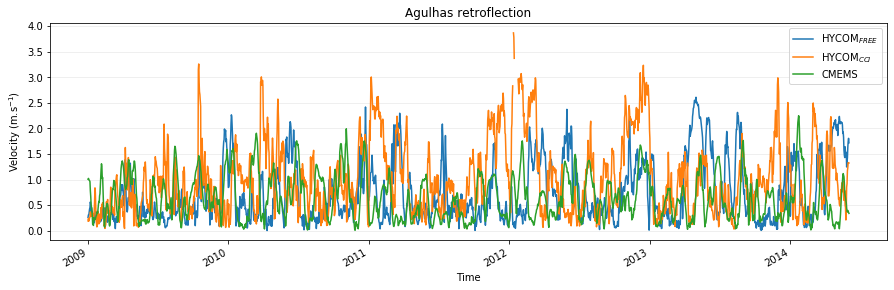

In [31]:
plt.figure(figsize=(15,4))

ret_free = np.sqrt(np.square(ret_free['v']) + np.square(ret_free['u']))
ret_cci = np.sqrt(np.square(ret_cci['v']) + np.square(ret_cci['u']))
ret_cmems = np.sqrt(np.square(ret_cmems['vgos']) + np.square(ret_cmems['ugos']))

ret_free.plot.line(x='time',label='HYCOM$_{FREE}$')
ret_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
ret_cmems.plot.line(x='time',label='CMEMS')
plt.title('Agulhas retroflection')
plt.ylabel('Velocity (m.s$^{-1}$)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Agulhas Plateau loop

### Magnitude & Direction vs CMEMS

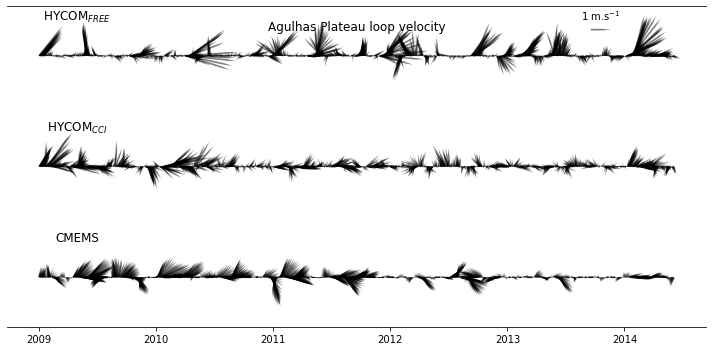

In [22]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Agulhas Plateau loop velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(apl_free['time'].values, 0, apl_free['u'][:,0], apl_free['v'][:,0], scale=35, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.85, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(apl_cci['time'].values, 0, apl_cci['u'][:,0], apl_cci['v'][:,0], scale=35, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(apl_cmems['time'].values, 0, apl_cmems['ugos'], apl_cmems['vgos'], scale=35, alpha=0.5, headwidth=1)
plt.title('CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_AgulhasPlateauloop_quiver.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Magnitude & Direction vs Globcurrent

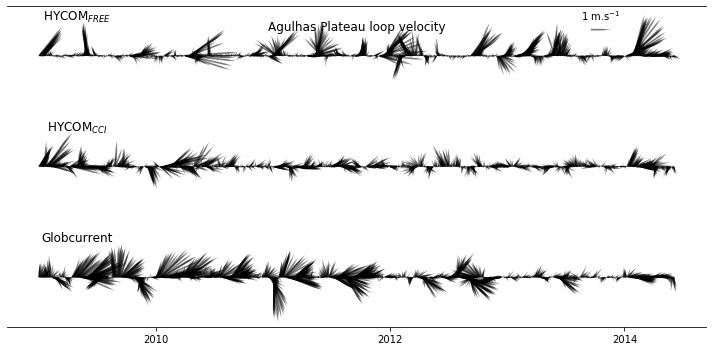

In [13]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Agulhas Plateau loop velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(apl_free['time'].values, 0, apl_free['u'][:,0], apl_free['v'][:,0], scale=35, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.85, 0.765, 1, '1 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(apl_cci['time'].values, 0, apl_cci['u'][:,0], apl_cci['v'][:,0], scale=35, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(apl_gc['time'].values, 0, apl_gc['eastward_eulerian_current_velocity'], apl_gc['northward_eulerian_current_velocity'], scale=25, alpha=0.5, headwidth=1)
plt.title('Globcurrent', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_AgulhasPlateauloop_quiver_gc.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

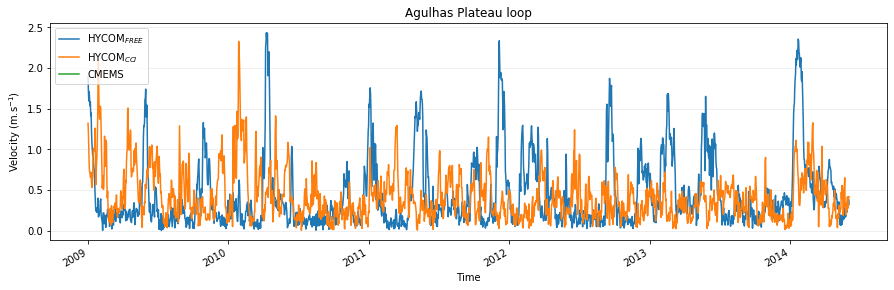

In [32]:
plt.figure(figsize=(15,4))

apl_free = np.sqrt(np.square(apl_free['v']) + np.square(apl_free['u']))
apl_cci = np.sqrt(np.square(apl_cci['v']) + np.square(apl_cci['u']))
apl_cmems = np.sqrt(np.square(apl_cmems['vgos']) + np.square(apl_cmems['ugos']))

apl_free.plot.line(x='time',label='HYCOM$_{FREE}$')
apl_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
apl_cmems.plot.line(x='time',label='CMEMS')
plt.title('Agulhas Plateau loop')
plt.ylabel('Velocity (m.s$^{-1}$)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Agulhas Bank

### Magnitude & Direction vs CMEMS

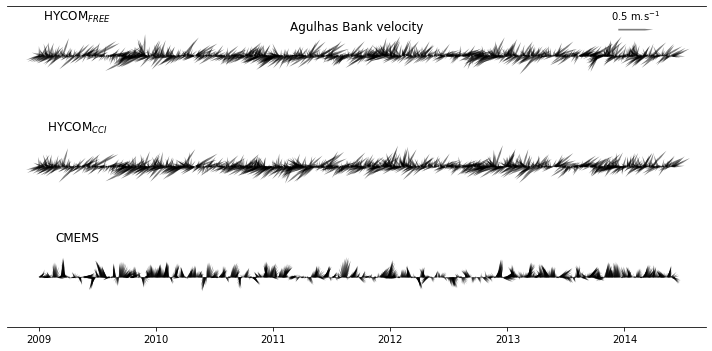

In [29]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Agulhas Bank velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(aba_free['time'].values, 0, aba_free['u'][:,0], aba_free['v'][:,0], scale=10, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 0.5, '0.5 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(aba_cci['time'].values, 0, aba_cci['u'][:,0], aba_cci['v'][:,0], scale=10, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(aba_cmems['time'].values, 0, aba_cmems['ugos'], aba_cmems['vgos'], scale=10, alpha=0.5, headwidth=1)
plt.title('CMEMS', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_AgulhasBank_quiver.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

### Magnitude & Direction vs Globcurrent

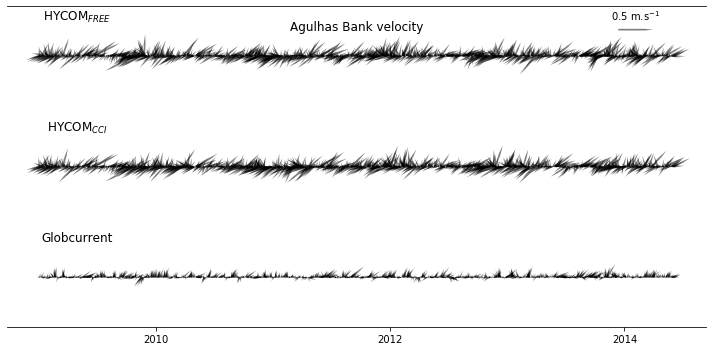

In [15]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Agulhas Bank velocity', y=0.93)

ax1 = plt.subplot(3,1,1)

q = ax1.quiver(aba_free['time'].values, 0, aba_free['u'][:,0], aba_free['v'][:,0], scale=10, alpha=0.5, headwidth=1)
ax1.quiverkey(q, 0.9, 0.765, 0.5, '0.5 m.s$^{-1}$', coordinates='axes')
plt.title('HYCOM$_{FREE}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax1.grid(axis='y', alpha=0.25)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
# ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax2 = plt.subplot(3,1,2)

ax2.quiver(aba_cci['time'].values, 0, aba_cci['u'][:,0], aba_cci['v'][:,0], scale=10, alpha=0.5, headwidth=1)
plt.title('HYCOM$_{CCI}$', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax2.grid(axis='y', alpha=0.25)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

ax3 = plt.subplot(3,1,3)

ax3.quiver(aba_gc['time'].values, 0, aba_gc['eastward_eulerian_current_velocity'], aba_gc['northward_eulerian_current_velocity'], scale=25, alpha=0.5, headwidth=1)
plt.title('Globcurrent', x=0.1, y=0.8)
plt.ylabel('Velocity (m.s$^{-1}$)')
ax3.grid(axis='y', alpha=0.25)
ax3.yaxis.set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)
# ax3.spines["bottom"].set_visible(False)
# ax3.xaxis.set_visible(False)

plt.savefig('../Figures/vel/TimeSeries_AgulhasBank_quiver_gc.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.tight_layout()

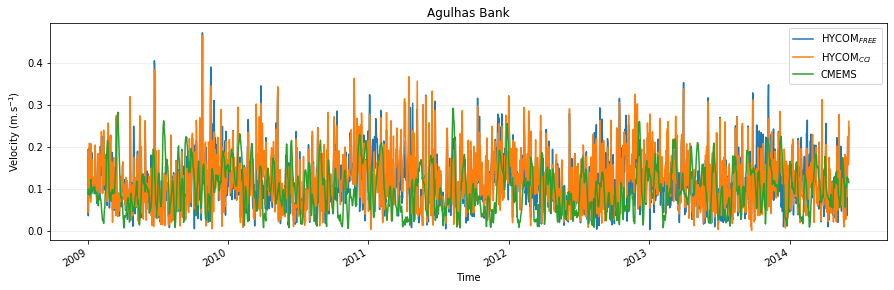

In [22]:
plt.figure(figsize=(15,4))

aba_free = np.sqrt(np.square(aba_free['v']) + np.square(aba_free['u']))
aba_cci = np.sqrt(np.square(aba_cci['v']) + np.square(aba_cci['u']))
aba_cmems = np.sqrt(np.square(aba_cmems['vgos']) + np.square(aba_cmems['ugos']))

aba_free.plot.line(x='time',label='HYCOM$_{FREE}$')
aba_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
aba_cmems.plot.line(x='time',label='CMEMS')
plt.title('Agulhas Bank')
plt.ylabel('Velocity (m.s$^{-1}$)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Port Shepstone current core

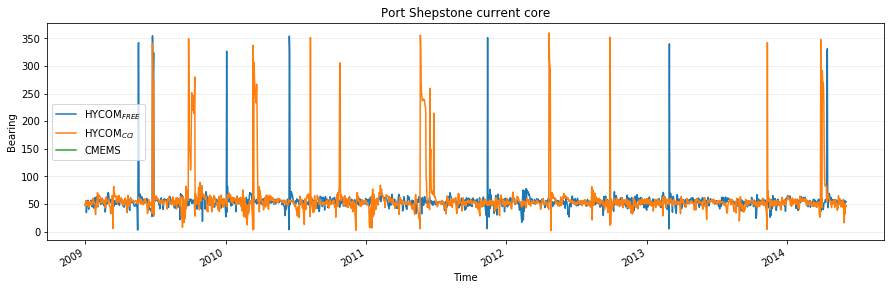

In [26]:
plt.figure(figsize=(15,4))

ps_free = np.degrees(np.arctan2(ps_free['v'].values,ps_free['u'])) + 180
ps_cci = np.degrees(np.arctan2(ps_cci['v'],ps_cci['u'])) + 180
ps_cmems = np.degrees(np.arctan2(ps_cmems['vgos'],ps_cmems['ugos'])) + 180

ps_free.plot.line(x='time',label='HYCOM$_{FREE}$')
ps_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
ps_cmems.plot.line(x='time',label='CMEMS')
plt.title('Port Shepstone current core')
plt.ylabel('Bearing')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Port Elizabeth current core

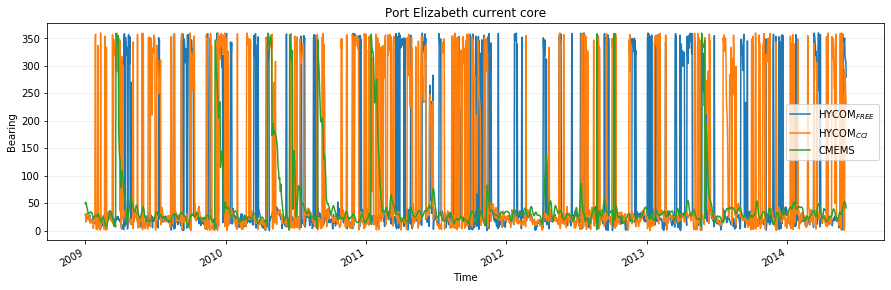

In [27]:
plt.figure(figsize=(15,4))

pe_free = np.degrees(np.arctan2(pe_free['v'].values,pe_free['u'])) + 180
pe_cci = np.degrees(np.arctan2(pe_cci['v'],pe_cci['u'])) + 180
pe_cmems = np.degrees(np.arctan2(pe_cmems['vgos'],pe_cmems['ugos'])) + 180

pe_free.plot.line(x='time',label='HYCOM$_{FREE}$')
pe_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
pe_cmems.plot.line(x='time',label='CMEMS')
plt.title('Port Elizabeth current core')
plt.ylabel('Bearing')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Agulhas retroflection

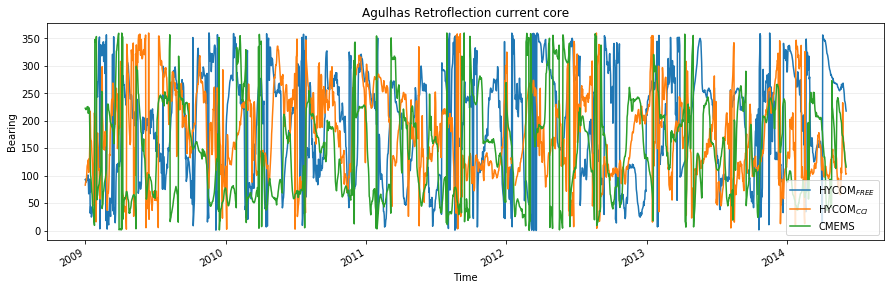

In [28]:
plt.figure(figsize=(15,4))

ret_free = np.degrees(np.arctan2(ret_free['v'].values,ret_free['u'])) + 180
ret_cci = np.degrees(np.arctan2(ret_cci['v'],ret_cci['u'])) + 180
ret_cmems = np.degrees(np.arctan2(ret_cmems['vgos'],ret_cmems['ugos'])) + 180

ret_free.plot.line(x='time',label='HYCOM$_{FREE}$')
ret_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
ret_cmems.plot.line(x='time',label='CMEMS')
plt.title('Agulhas Retroflection current core')
plt.ylabel('Bearing')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Agulhas Plateau loop

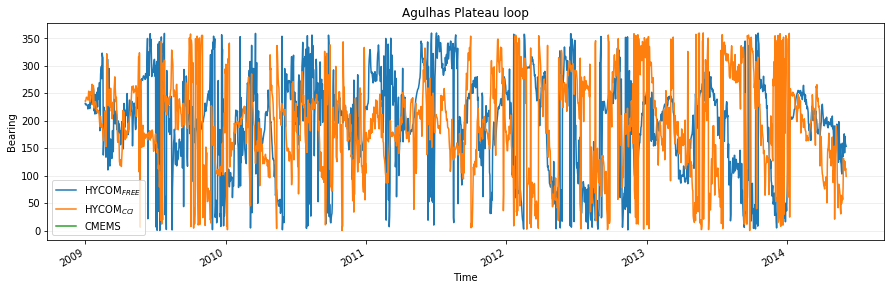

In [29]:
plt.figure(figsize=(15,4))

apl_free = np.degrees(np.arctan2(apl_free['v'].values,apl_free['u'])) + 180
apl_cci = np.degrees(np.arctan2(apl_cci['v'],apl_cci['u'])) + 180
apl_cmems = np.degrees(np.arctan2(apl_cmems['vgos'],apl_cmems['ugos'])) + 180

apl_free.plot.line(x='time',label='HYCOM$_{FREE}$')
apl_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
apl_cmems.plot.line(x='time',label='CMEMS')
plt.title('Agulhas Plateau loop')
plt.ylabel('Bearing')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

### Agulhas Bank

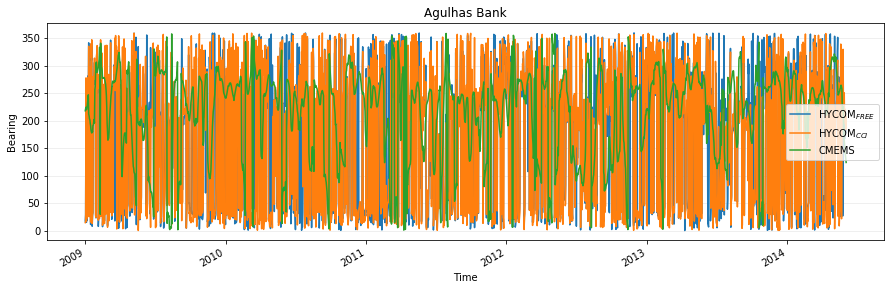

In [30]:
plt.figure(figsize=(15,4))

aba_free = np.degrees(np.arctan2(aba_free['v'].values,aba_free['u'])) + 180
aba_cci = np.degrees(np.arctan2(aba_cci['v'],aba_cci['u'])) + 180
aba_cmems = np.degrees(np.arctan2(aba_cmems['vgos'],aba_cmems['ugos'])) + 180

aba_free.plot.line(x='time',label='HYCOM$_{FREE}$')
aba_cci.plot.line(x='time',label='HYCOM$_{CCI}$')
aba_cmems.plot.line(x='time',label='CMEMS')
plt.title('Agulhas Bank')
plt.ylabel('Bearing')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

## HYCOM<sub>FREE</sub>

/home/harry/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


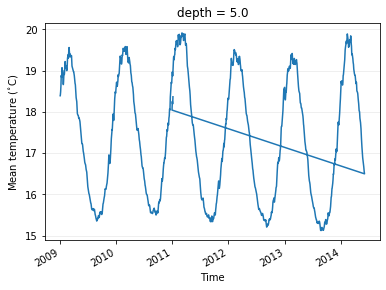

In [5]:
ds_free_timeseries['temperature'].plot()
plt.ylabel('Mean temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

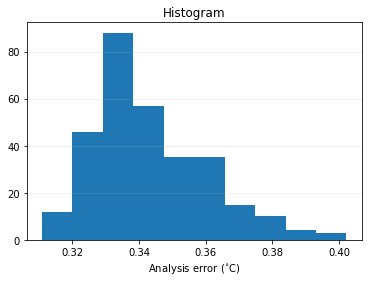

In [42]:
CCI_timeseries.plot.hist()
plt.xlabel('Analysis error ($^{\circ}$C)')
plt.grid(axis='y', alpha=0.25)

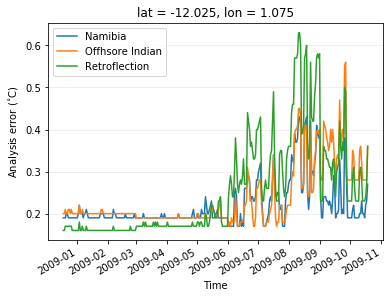

In [8]:
CCI.analysis_uncertainty.isel(lon=11, lat=-17).plot.line(x='time', label='Namibia')
CCI.analysis_uncertainty.isel(lon=37, lat=-39).plot.line(x='time', label='Offhsore Indian')
CCI.analysis_uncertainty.isel(lon=21, lat=-41).plot.line(x='time', label='Retroflection')
plt.ylabel('Analysis error ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

## HYCOM<sub>CCI</sub>

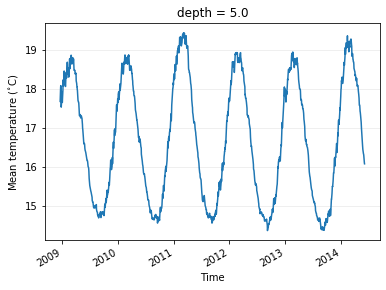

In [21]:
ds_cci_timeseries['temperature'].plot()
plt.ylabel('Mean temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

#### Rolling mean test

In [27]:
# create rolling mean
# ds_cci_timeseries['temperature']

# cci_temp_rolling = ds_cci.rolling(time=365, center=True).mean(dim=('longitude','latitude'), skipna=True)
cci_temp_rolling = ds_cci_timeseries['temperature'].rolling(time=365, center=True).mean()

In [17]:
ds_cci_timeseries

<xarray.Dataset>
Dimensions:      (depth: 1, time: 1995)
Coordinates:
  * time         (time) datetime64[ns] 2008-12-18 2008-12-19 ... 2014-06-04
  * depth        (depth) float32 5.0
Data variables:
    mercator     float64 -2.147e+09
    x            float32 30.0
    y            float32 -0.59305453
    model_depth  float32 3870.213
    temperature  (time, depth) float32 17.684162 17.81782 ... 16.106533 16.08207
    u            (time, depth) float32 0.04220993 0.05429556 ... 0.035968564
    v            (time, depth) float32 -0.017690849 -0.008690205 ... 0.019931216
    ssh          (time) float32 0.27091807 0.2804947 ... 0.21975167 0.21528742

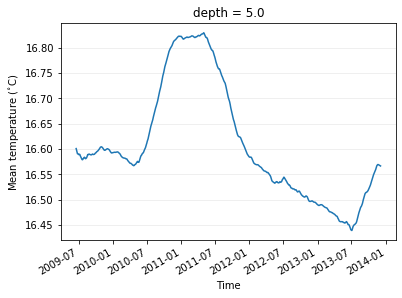

In [28]:
# cci_temp_rolling = ds_cci_timeseries['temperature'].rolling(time=365, center=True)
cci_temp_rolling.plot()
plt.ylabel('Mean temperature ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)

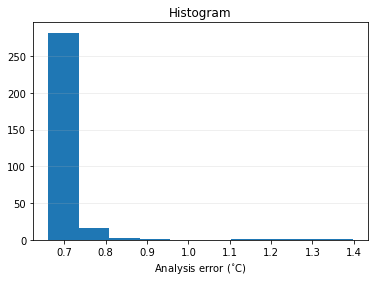

In [45]:
OSTIA_timeseries.plot.hist()
plt.xlabel('Analysis error ($^{\circ}$C)')
plt.grid(axis='y', alpha=0.25)

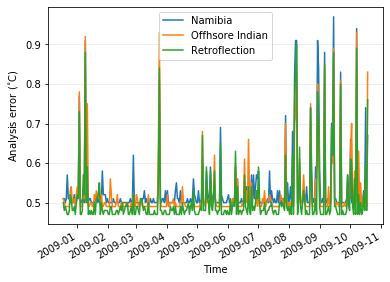

In [46]:
OSTIA.analysis_error.isel(lon=11, lat=-17).plot.line(x='time', label='Namibia')
OSTIA.analysis_error.isel(lon=37, lat=-39).plot.line(x='time', label='Offhsore Indian')
OSTIA.analysis_error.isel(lon=21, lat=-41).plot.line(x='time', label='Retroflection')
plt.ylabel('Analysis error ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

## CCI vs OSTIA

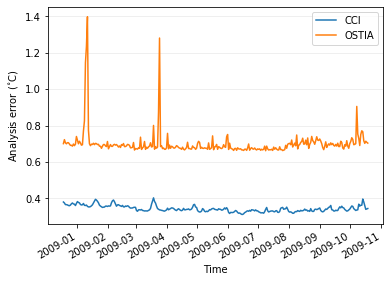

In [6]:
CCI_timeseries.plot(label='CCI')
OSTIA_timeseries.plot(label='OSTIA')
plt.ylabel('Analysis error ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()
plt.savefig('CCIvsOSTIA_timeseries.png', dpi=300, bbox_inches='tight', format='png')

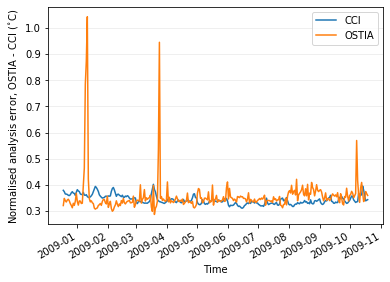

In [7]:
CCI_timeseries.plot(label='CCI')
Normalised_OSTIA.plot(label='OSTIA')
plt.ylabel('Normalised analysis error, OSTIA - CCI ($^{\circ}$C)')
plt.xlabel('Time')
plt.grid(axis='y', alpha=0.25)
plt.legend()

In [18]:
xr.decode_cf(CCI)

<xarray.Dataset>
Dimensions:               (lat: 801, lon: 1200, time: 305)
Coordinates:
  * time                  (time) datetime64[ns] 2008-12-18T12:00:00 ... 2009-10-18T12:00:00
  * lat                   (lat) float32 -50.025 -49.975 ... -10.075 -10.025
  * lon                   (lon) float32 0.025 0.075 0.125 ... 59.925 59.975
Data variables:
    analysis_uncertainty  (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.5, Unidata Observation Dataset v1.0
    title:                           ESA SST CCI OSTIA L4 product
    summary:                         OSTIA L4 product from the ESA SST CCI pr...
    references:                      http://www.esa-sst-cci.org
    institution:                     ESACCI
    history:                         Created using OSTIA reanalysis system v3.0
    comment:                         These data were produced at the Met Offi...
    license:                         Creative Commons Licence by attribution ...
    id:  